In [8]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
!pip install pandas-ta
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader 
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import numpy as np 
import pandas as pd   
from datetime import timedelta, datetime, date
import matplotlib.pyplot as plt
import pandas_datareader as web 

In [12]:
today = date.today()
date_today = today.strftime("%Y-%m-%d")
date_start = '2022-01-01'

In [13]:
stockname = 'AAPL' #input("Enter stock symbol: ")
df = web.DataReader(stockname ,'yahoo' ,start=date_start, end=date_today)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,182.880005,177.710007,177.830002,182.009995,104487900.0,181.511703
2022-01-04,182.940002,179.119995,182.630005,179.699997,99310400.0,179.208038
2022-01-05,180.169998,174.639999,179.610001,174.919998,94537600.0,174.441116
2022-01-06,175.300003,171.639999,172.699997,172.000000,96904000.0,171.529129
2022-01-07,174.139999,171.029999,172.889999,172.169998,86709100.0,171.698654
...,...,...,...,...,...,...
2022-06-16,132.389999,129.039993,132.080002,130.059998,108123900.0,130.059998
2022-06-17,133.080002,129.809998,130.070007,131.559998,134118500.0,131.559998
2022-06-21,137.059998,133.320007,133.419998,135.869995,81000500.0,135.869995


In [14]:
from pmdarima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train = data[:72]
valid = data[72:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=47)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.06 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=341.079, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=328.970, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=339.198, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=321.875, Time=0.17 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=323.875, Time=0.35 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=323.163, Time=0.14 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=319.763, Time=0.26 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=328.419, Time=0.09 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=320.785, Time=0.72 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=321.356, Time=0.31 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=321.53

In [15]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

23.20621643317513

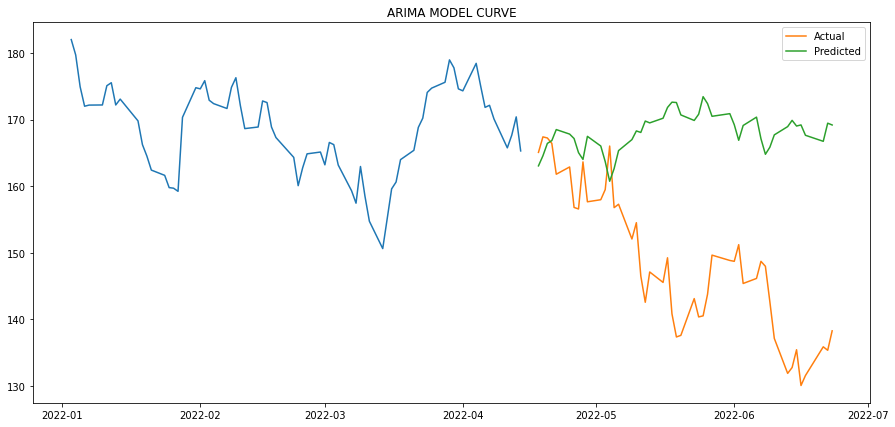

In [16]:
plt.figure(figsize=(15,7))
plt.title('ARIMA MODEL CURVE')
plt.plot(train['Close'])
plt.plot(valid['Close'], label=('Actual'))
plt.plot(forecast['Prediction'], label=('Predicted'))
plt.legend()

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 

actual = np.array(valid['Close'])
predicted = np.array(forecast['Prediction'])
print('ARIMA MODEL ERROR RESULTS')

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(actual, predicted)
print(f'Mean Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(actual, predicted)/ actual))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(actual, predicted)/ actual)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

ARIMA MODEL ERROR RESULTS
Mean Absolute Error (MAE): 19.98
Mean Absolute Percentage Error (MAPE): 14.08 %
Median Absolute Percentage Error (MDAPE): 14.81 %


In [18]:
price_today = np.round(valid['Close'].iloc[-1],2)
predicted_price = np.round(forecast['Prediction'].iloc[-1],2)
change_percent = np.round(100 - (price_today * 100)/predicted_price, 2)

plus = '+'; minus = ''
print("Result of the predicted price on a given day (Using ARIMA model)")
print(f'The close price for {stockname} at {today} is {price_today}')
print(f'The predicted close price is {predicted_price} ({plus if change_percent > 0 else minus}{change_percent}%)')

Result of the predicted price on a given day (Using ARIMA model)
The close price for AAPL at 2022-06-24 is 138.27
The predicted close price is 169.18 (+18.27%)


In [19]:
from scipy import stats
stats.pearsonr(actual, predicted)

(-0.6184609913521142, 3.607280539032084e-06)